In [1]:
from ipynb.fs.full.data_cleaning import df, serviceDf
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
11781,Home Improvement,Carpet Cleaning,Peripheral,Jennifer's Cleaning Services,11.00,65.00,,4.50,67052,Wichita,Kansas,KS,715.00
18019,Home Improvement,Central Air Conditioning Repair or Maintenance,Peripheral,Plumbingtree & heating,NaN,61.00,service,5.00,80202,Denver,Colorado,CO,NaN
25230,Home Improvement,House Cleaning,Main,ACAZ CLEANING,32.00,100.00,,4.50,43215,Columbus,Ohio,OH,"3,200.00"


In [2]:
df.shape

(18814, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,10453,0.56
1,Events,3486,0.19
5,Wellness,1595,0.08
3,Lessons,1493,0.08
0,Business,1254,0.07
4,Pets,533,0.03


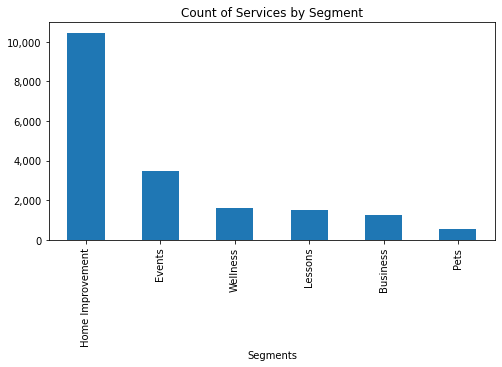

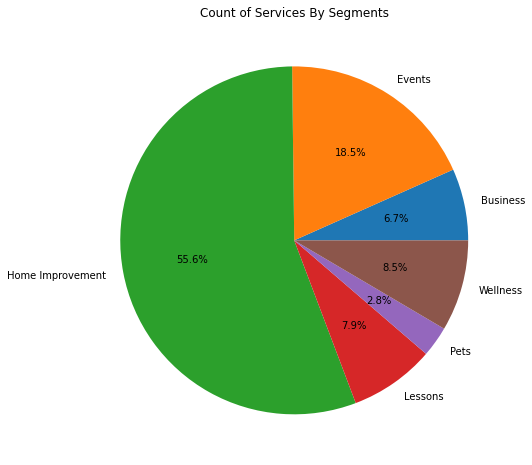

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Services,Count,Contribution
97,Wedding Officiant,839,0.04
33,Commercial Cleaning,832,0.04
1,Accounting,791,0.04
31,Closet and Shelving System Installation,755,0.04
99,Wedding and Event Makeup,712,0.04
67,Massage Therapy,697,0.04
44,DJ,684,0.04
63,Interior Design,627,0.03
82,Roof Repair or Maintenance,512,0.03
98,Wedding and Event Catering,504,0.03


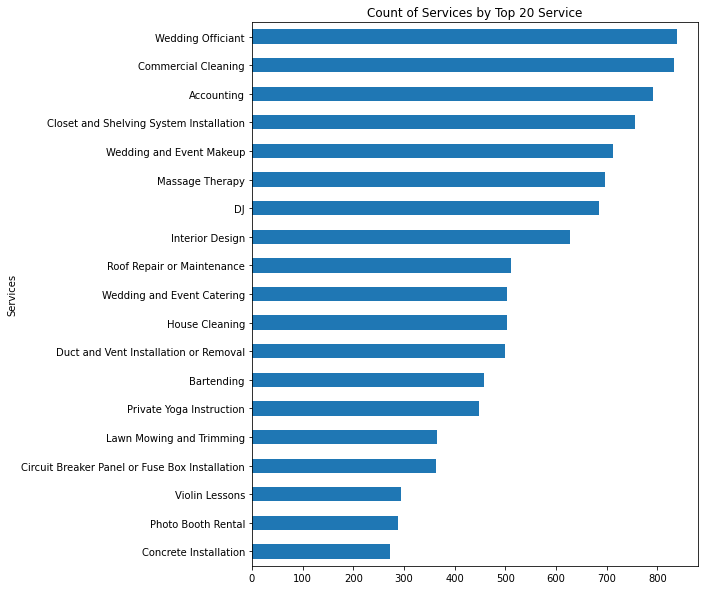

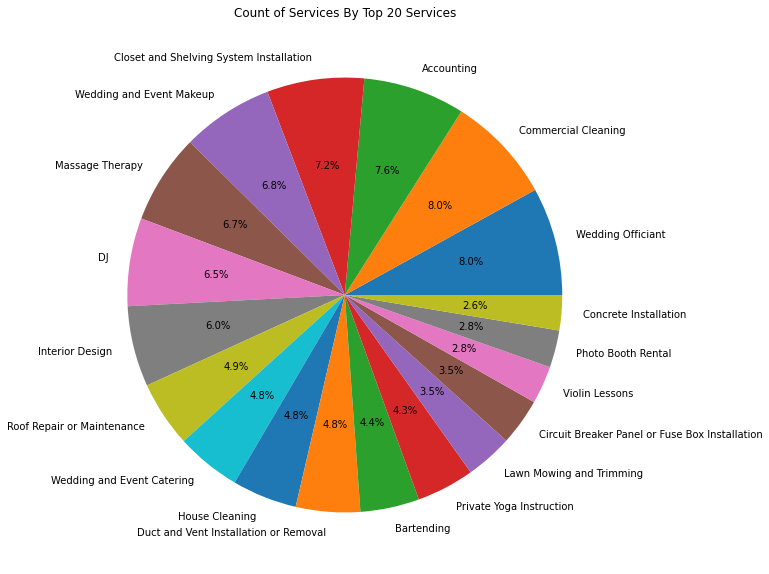

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

# Which segments are doing better or worse?

Maybe see implied revenue from these segments

In [7]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [8]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
2,Home Improvement,"25,875,280.00",0.45
1,Events,"21,770,915.00",0.38
0,Business,"4,122,263.00",0.07
5,Wellness,"3,562,406.00",0.06
3,Lessons,"2,172,309.00",0.04
4,Pets,"304,754.00",0.01


In [9]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
97,Wedding Officiant,"9,046,401.00",0.16
44,DJ,"5,589,660.00",0.10
72,Photo Booth Rental,"3,617,129.00",0.06
14,Bed Bug Extermination,"3,336,025.00",0.06
32,Commercial Carpet Cleaning,"3,153,028.00",0.05
33,Commercial Cleaning,"2,400,480.00",0.04
67,Massage Therapy,"2,149,258.00",0.04
28,Circuit Breaker Panel or Fuse Box Installation,"2,029,377.00",0.04
99,Wedding and Event Makeup,"1,802,999.00",0.03


In [10]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"7,949,264.00",0.14
43,Texas,"5,695,262.00",0.10
9,Florida,"3,808,178.00",0.07
30,New Jersey,"2,673,101.00",0.05
32,New York,"2,324,083.00",0.04
10,Georgia,"2,092,703.00",0.04
5,Colorado,"2,032,435.00",0.04
25,Missouri,"1,949,400.00",0.03
33,North Carolina,"1,914,566.00",0.03


# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [11]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"391,089.00",0.61
1,Events,"129,867.00",0.20
5,Wellness,"38,272.00",0.06
0,Business,"37,767.00",0.06
3,Lessons,"31,698.00",0.05
4,Pets,"12,814.00",0.02


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [12]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
2,Home Improvement,10453,"391,089.00",37.41
1,Events,3486,"129,867.00",37.25
0,Business,1254,"37,767.00",30.12
4,Pets,533,"12,814.00",24.04
5,Wellness,1595,"38,272.00",23.99
3,Lessons,1493,"31,698.00",21.23


## Hires by Services

Look at the top 20.

In [13]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

#### Top 20 Hires Count

In [14]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
97,Wedding Officiant,"42,478.00",0.07,Events
33,Commercial Cleaning,"31,138.00",0.05,Home Improvement
44,DJ,"23,840.00",0.04,Events
21,Carpet Cleaning,"23,342.00",0.04,Home Improvement
99,Wedding and Event Makeup,"22,463.00",0.04,Events
67,Massage Therapy,"22,022.00",0.03,Wellness
32,Commercial Carpet Cleaning,"21,354.00",0.03,Home Improvement
31,Closet and Shelving System Installation,"19,413.00",0.03,Home Improvement
62,House Cleaning,"18,999.00",0.03,Home Improvement
28,Circuit Breaker Panel or Fuse Box Installation,"16,587.00",0.03,Home Improvement


#### Bottom 20 Hires Count

In [15]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[-19:]

,Services,Total Hires,Contribution,Segments
65,Life Coaching,"1,163.00",0.00,Wellness
47,Deck or Porch Repair,"1,092.00",0.00,Home Improvement
8,Asbestos Removal,"1,018.00",0.00,Home Improvement
95,Voice Over Lessons,"1,010.00",0.00,Lessons
76,Private Swim Lessons,986.00,0.00,Lessons
84,Science Tutoring,913.00,0.00,Lessons
9,Asphalt Installation,905.00,0.00,Home Improvement
83,Saxophone Lessons,896.00,0.00,Lessons
19,Cabinet Refinishing and Repair,783.00,0.00,Home Improvement
89,Social Sciences Tutoring,731.00,0.00,Lessons


### The Hires Ratio

In [16]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

#### Top 20 Hires Ratio

In [17]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
4,Appliance Repair or Maintenance,90,"10,775.00",119.72,Home Improvement
49,Dishwasher Installation,93,"10,822.00",116.37,Home Improvement
24,Carpet Repair or Partial Replacement,49,"5,564.00",113.55,Home Improvement
32,Commercial Carpet Cleaning,198,"21,354.00",107.85,Home Improvement
66,Logo Design,52,"5,573.00",107.17,Business
21,Carpet Cleaning,236,"23,342.00",98.91,Home Improvement
3,Appliance Installation,109,"10,441.00",95.79,Home Improvement
93,Test Prep Services,33,"2,998.00",90.85,Lessons
25,Cat Grooming,44,"3,754.00",85.32,Pets
61,Handyman,213,"15,959.00",74.92,Home Improvement


#### Bottom 20 Hires Ratio

In [18]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[-19:]

,Services,Count,Total Hires,Hire Ratio,Segments
86,Sign Language Lessons,4,65.00,16.25,Lessons
50,Dog Walking,187,"2,864.00",15.32,Pets
60,General Contracting,246,"3,338.00",13.57,Home Improvement
1,Accounting,791,"10,069.00",12.73,Business
12,Basement Finishing or Remodeling,153,"1,909.00",12.48,Home Improvement
9,Asphalt Installation,73,905.00,12.40,Home Improvement
85,Sewing Lessons,44,520.00,11.82,Lessons
10,Asphalt Repair and Maintenance,107,"1,208.00",11.29,Home Improvement
6,Architectural Services,125,"1,315.00",10.52,Home Improvement
38,Construction Services,128,"1,338.00",10.45,Home Improvement


### Scatter of Count and Number of Hires

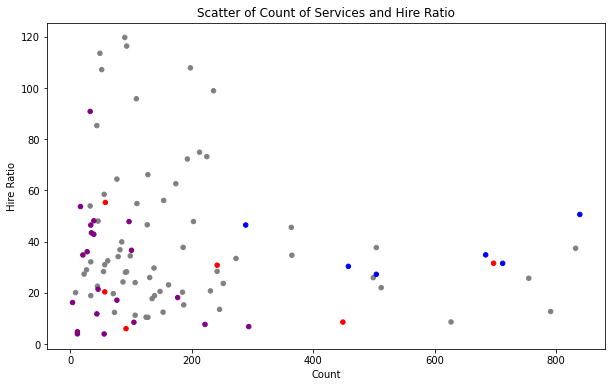

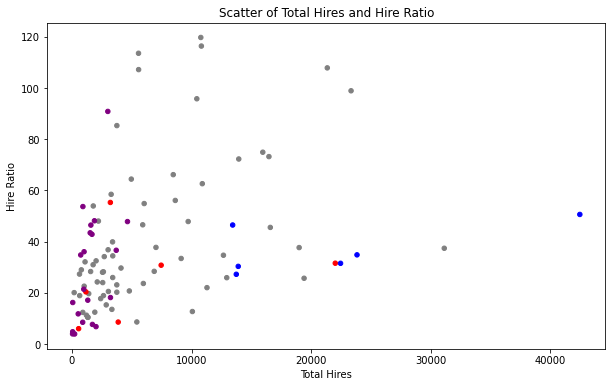

In [19]:
colors = {
    "Home Improvement": "gray",
    "Business": "gray",
    "Pets": "gray",
    "Events": "blue",
    "Wellness": "red",
    "Lessons": "purple",
}

dfCountMergeServices.plot.scatter(
    title="Scatter of Count of Services and Hire Ratio",
    x="Count",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

dfCountMergeServices.plot.scatter(
    title="Scatter of Total Hires and Hire Ratio",
    x="Total Hires",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

From the first scatterplot, it could mean that services with a higher count could mean that there is no clear indication of specialization. It could be that:
- There are too many services for customers to choose from, confusing them
- There are just a lot of competitors, so the sellers would have to share more

# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?